# Deep Learning. Puppies

In [1]:
# Import Packages
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image

2024-06-28 11:48:38.311264: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-28 11:48:39.628765: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-28 11:48:42.404317: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-28 11:48:46.616582: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


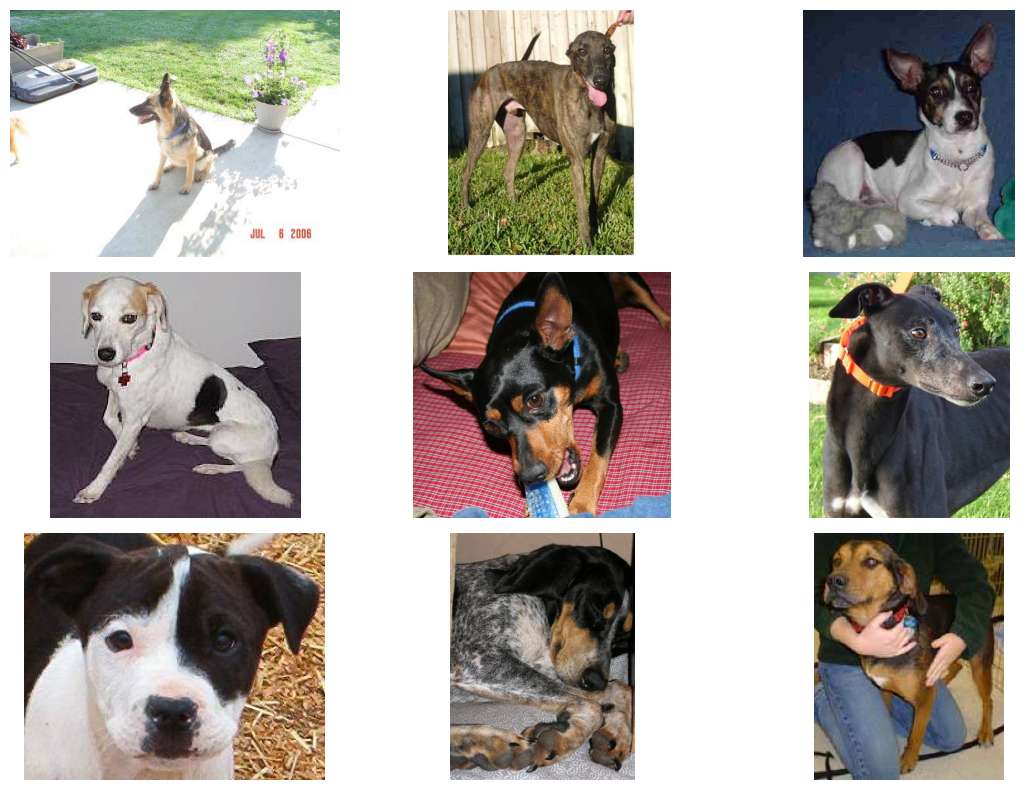

In [2]:
# Import and Check first 9 Dog Pictures
data_dir = "/workspaces/deep-learning-fetr/data/interim"
dog_subfolder = os.path.join(data_dir, "dogs")

# list of all dog image file names
dog_image_files = os.listdir(dog_subfolder)

# Load nine dog images
dog_images = []
for i in range(9):
    img_path = os.path.join(dog_subfolder, dog_image_files[i])
    img = image.load_img(img_path)  
    img_array = image.img_to_array(img)
    img_array /= 255.0  # Normalize pixel values to [0, 1]
    dog_images.append(img_array)


plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

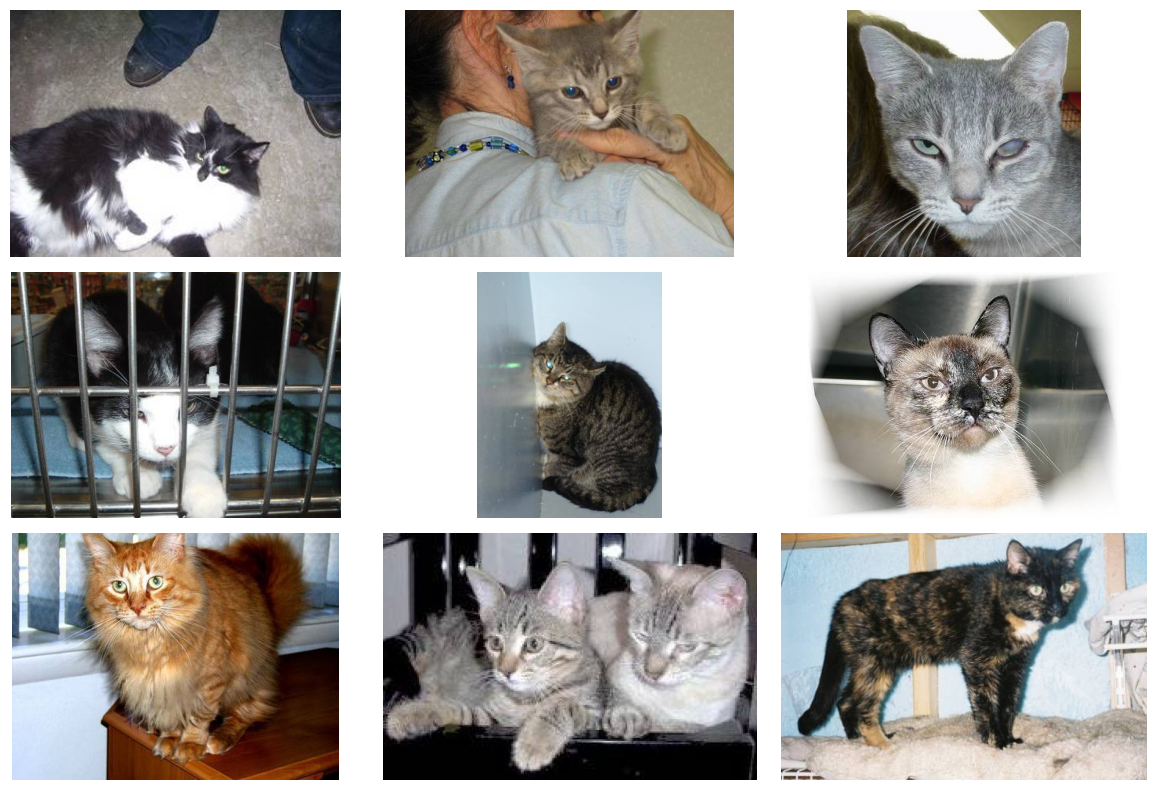

In [3]:
# Import and Check 9 Cat Pictures

data_dir = "/workspaces/deep-learning-fetr/data/interim"
cats_subfolder = os.path.join(data_dir, "cats")

# list of all Cat image file names
cats_image_files = os.listdir(cats_subfolder)

# Load the nine cat images
cats_images = []
for i in range(min(9, len(cats_image_files))):  
    img_path = os.path.join(cats_subfolder, cats_image_files[i])
    img = image.load_img(img_path)
    img_array = image.img_to_array(img)
    img_array /= 255.0
    cats_images.append(img_array)

plt.figure(figsize=(12, 8))

for i in range(len(cats_images)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cats_images[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define a few rules for DataGen
train_dir = "/workspaces/deep-learning-fetr/data/interim"
image_size = (200, 200)

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

# Train Data Generation
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["dogs", "cats"] 
)

# Test Data Generation
test_data = datagentest.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["test"] 
)

Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [5]:
# Move the Data Through the Neural Network
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

model = Sequential()
model.add(Conv2D(input_shape = (224,224,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

# Move the Data through the Dense Layers
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

/home/vscode/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-06-28 11:48:55.057547: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2024-06-28 11:48:55.664396: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2024-06-28 11:48:55.828781: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2024-06-28 11:48:56.137911: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.
2024-06-28 11:48:56.220628: W external/local_tsl/tsl/fr

In [6]:
# Compile the Model using Adam 
from keras.optimizers import Adam

# Compile the Model before Training
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"])

In [7]:
model.fit(train_data, epochs = 1)

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 25088, but received input with shape (None, 18432)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 200, 200, 3), dtype=float32)
  • training=True
  • mask=None